# Introducción al Aprendizaje Automático &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; UANL - FCFM
---
## Modelos de aprendizaje no supervisado para clustering 

**Alumnos**
- Ian Mauricio Saucedo Alemán &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1868954
- José Raúl Evangelista Mendoza &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1810806
- Johan Jefte Rodriguez Santos &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1865007
- Ramses Fernando Peña Rojo &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1859218
- Leonardo Roman Saenz Flores &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1855453

# Leer y limpiar datos 

En esta seccion, leemos y limpiamos los datos del dataset Bank cluster para su correcto uso en los modelos. 

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#df_data = pd.read_excel('/content/BankCluster.xlsx')
df_data = pd.read_excel('./BankCluster.xlsx')

In [ ]:
df_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
label = LabelEncoder()
scaler = StandardScaler()
def clean_bank_data(data): 
  X = data.drop(labels=['day', 'month', 'y'], axis = 1)
  y = data['y']
  to_label = ['education', 'default', 'housing', 'loan']
  to_dummies = ['job', 'marital', 'contact', 'poutcome']
  dicts_labels = []
  for lab in to_label: 
    X[lab] = label.fit_transform(X[lab])
    dicts_labels.append({x:y for x,y in enumerate(label.classes_)})
  X = pd.get_dummies(X, drop_first=True, columns=to_dummies)
  columns = X.columns
  print(X.head())
  X = scaler.fit_transform(X)
  return X , y, columns

x, y, columns = clean_bank_data(df_data)

   age  education  default  ...  poutcome_other  poutcome_success  poutcome_unknown
0   30          0        0  ...               0                 0                 1
1   33          1        0  ...               0                 0                 0
2   35          2        0  ...               0                 0                 0
3   30          2        0  ...               0                 0                 1
4   59          1        0  ...               0                 0                 1

[5 rows x 28 columns]


In [ ]:
print(x[20, 1])

2.362396938326623


Podemos observar que nuestros datos estan estandarizados

In [ ]:
x.mean(axis=0).round(2),x.var(axis=0)

(array([-0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,
        -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,
         0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

# Clustering jerarquico 

En esta seccion usamos el clustering jerarquico con nuestros datos 

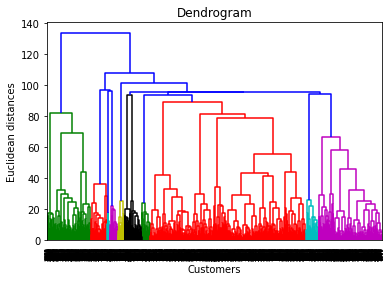

In [ ]:
import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable 
# linkage is actually the algorithm itself of hierarchical clustering and then in 
#linkage we have to specify on which data we apply and engage. This is X dataset

dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

In [ ]:
y_hc=hc.fit_predict(x)

In [ ]:
y_hc

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
y_out = np.array(y_hc)
np.unique(y_out)

array([0, 1, 2, 3, 4, 5])

In [ ]:
values = []
for i in range(6): 
  values.append(x[y_hc==i].shape[0])
  print("\nValues in cluster ", i, ": ", values[i])


Values in cluster  0 :  3477

Values in cluster  1 :  596

Values in cluster  2 :  110

Values in cluster  3 :  83

Values in cluster  4 :  217

Values in cluster  5 :  38


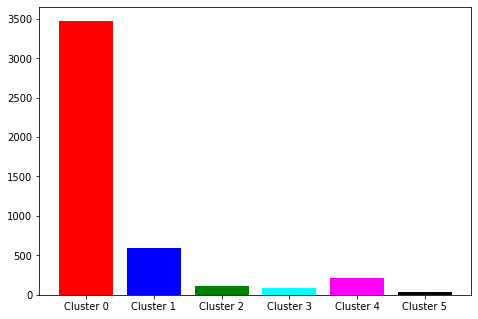

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
ax.bar(langs,values, color=['red', 'blue', 'green', 'cyan', 'magenta', 'black'])
plt.show()

In [ ]:
columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

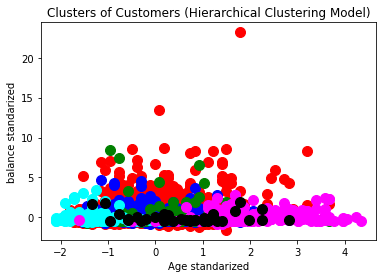

In [ ]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 3], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 3], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 3], s=100, c='green', label ='Cluster 3')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 3], s=100, c='cyan', label ='Cluster 4')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 3], s=100, c='magenta', label ='Cluster 5')
plt.scatter(x[y_hc==5, 0], x[y_hc==5, 3], s=100, c='black', label ='Cluster 6')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Age standarized')
plt.ylabel('balance standarized')
plt.show()

# K - Means

En esta seccion utilizamos un modelo de k means para realizar clusters 

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)


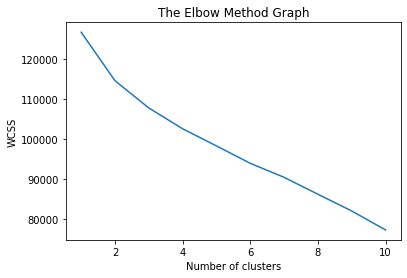

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init ='k-means++',max_iter=300,n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(x)

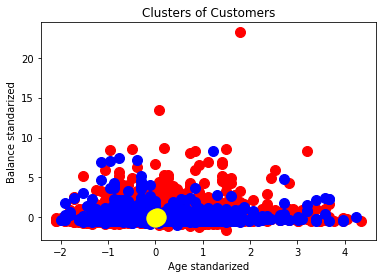

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 3], s=100, c='red', label ='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 3], s=100, c='blue', label ='Cluster 2')

#Plot the centroid. This time we're going to use the cluster centres  attribute that 
#returns here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age standarized')
plt.ylabel('Balance standarized')
plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)

principal_components = pca.fit_transform(x)
num_components = len(pca.components_)
print(num_components)

23


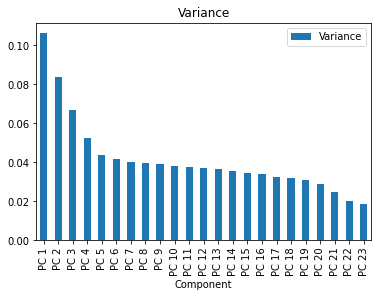

In [ ]:
pca_df1 = pd.DataFrame({'Component':['PC '+ str(x) for x in range(1,num_components+1)], 'Variance':pca.explained_variance_ratio_}).set_index('Component').plot(kind='bar',title='Variance')

In [ ]:
df_aux = pd.DataFrame({'Component':['PC '+ str(x) for x in range(1,num_components+1)],
              'Variance':pca.explained_variance_ratio_})
fig = px.bar(df_aux,y='Variance',x='Component',title='Variance')
fig.update_yaxes(tickformat="%")

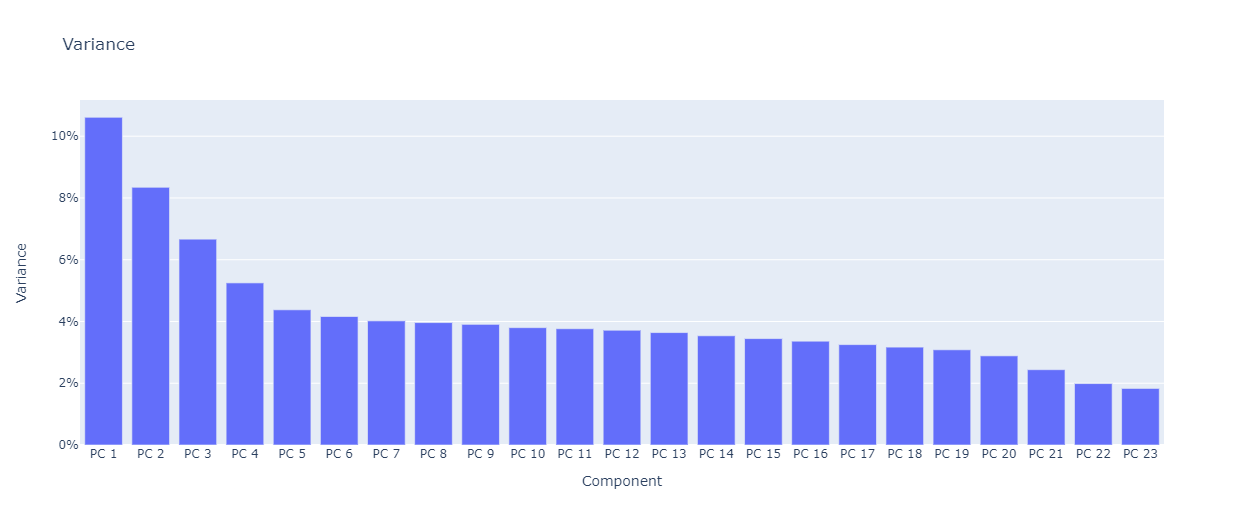

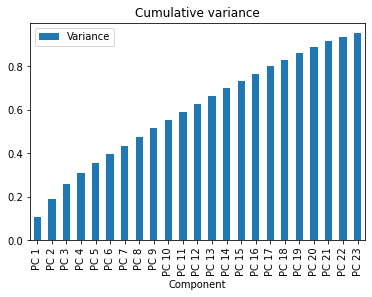

In [ ]:
pca_df2 = pd.DataFrame({'Component':['PC '+ str(x) for x in range(1,num_components+1)], 'Variance':pca.explained_variance_ratio_.cumsum()}).set_index('Component').plot(kind='bar',title='Cumulative variance')

In [ ]:
df_aux = pd.DataFrame({'Component':['PC '+ str(x).zfill(3) for x in range(1,num_components+1)],
              'Variance':pca.explained_variance_ratio_.cumsum()})
fig = px.bar(df_aux,y='Variance',x='Component',title='Cumulative variance')
fig.update_yaxes(tickformat="%")

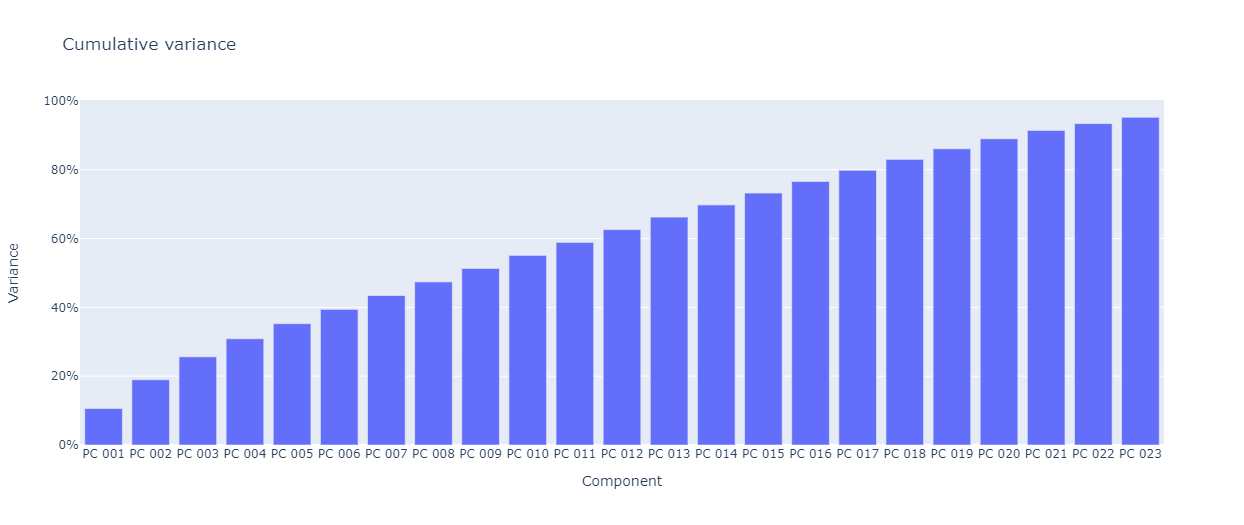

In [ ]:
principalDf = pd.DataFrame(data = principal_components,
                           columns = ['PC '+ str(x).zfill(3) for x in range(1,num_components+1)])
finalDf = pd.concat([principalDf, pd.DataFrame({'label':y})], axis = 1)
finalDf

,PC 001,PC 002,PC 003,PC 004,PC 005,PC 006,PC 007,PC 008,PC 009,PC 010,PC 011,PC 012,PC 013,PC 014,PC 015,PC 016,PC 017,PC 018,PC 019,PC 020,PC 021,PC 022,PC 023,label
0,-0.737074,0.570377,-0.080447,0.991931,-0.003195,-0.181834,-0.121798,1.480564,1.886470,-0.806104,-3.041523,-2.400757,-3.656433,0.324895,-1.155934,0.198849,1.632980,-0.204441,0.197843,0.838284,-0.128712,-0.179594,-0.756768,no
1,3.404771,0.924309,-1.667362,-0.679058,-0.958533,-1.849041,-2.258970,-1.409183,0.042664,-0.431833,0.147209,0.496141,0.355405,-0.723151,-0.241649,0.152989,2.043246,-0.052708,1.463228,0.152431,-1.122820,1.447999,0.322371,no
2,3.268183,-2.058774,0.300121,-1.146129,0.919816,0.034246,-0.206857,-0.084138,-1.024576,0.081690,-0.161365,-0.070192,0.166617,0.406720,-0.077860,0.408067,0.274974,-0.377516,-0.970545,-0.195805,-1.366875,0.816382,-0.240501,no
3,-1.099204,-0.498203,0.007461,-2.703017,-0.126329,-0.547099,0.036081,0.054248,-0.758271,0.050593,-0.192159,0.150498,0.566007,-0.481210,-0.264294,0.038426,1.407961,0.592998,0.613064,-1.766963,0.395087,-0.057061,-0.141582,no
4,-1.338255,1.741053,-1.503700,-0.338165,0.895007,0.922209,0.054981,0.299927,-0.319416,0.336917,0.058570,0.420920,-0.021488,0.650055,-0.155182,-0.224189,-0.133906,-0.167327,-0.596872,-0.478652,0.532162,0.264200,0.489108,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.795188,0.120243,-0.993044,-0.373492,-0.321693,-1.394646,-1.996736,-1.651839,0.703692,-0.487004,-0.696443,0.230979,0.017974,-0.626836,0.071485,-0.696529,-0.900796,0.156332,0.418183,0.858292,-0.757432,-0.429604,0.206121,no
4517,-1.536427,0.775003,-0.472854,-1.417212,-3.488048,-3.200608,0.217212,3.280932,0.686558,4.668776,0.222496,-0.732138,2.800048,2.834317,-2.497848,0.979432,-1.318410,-2.538397,1.706148,-1.575829,-0.031177,0.329311,0.382585,no
4518,-0.909289,0.952521,1.112887,0.478784,-1.855117,0.625410,1.663507,-1.543316,0.245373,0.045194,-0.600600,-0.287017,-0.275377,-0.691307,-0.024863,0.126179,-1.353545,1.399334,0.371916,0.694354,0.257005,0.426183,-0.283345,no
4519,3.998056,1.096760,-1.821849,-0.584709,0.715638,-0.726222,1.949658,-0.299136,0.649089,0.129930,0.258052,-0.179462,-0.475157,1.115235,0.607549,-0.575909,0.021399,0.982121,0.402426,1.820433,2.111518,-1.442705,0.865576,no


In [ ]:
px.scatter_3d(finalDf,x='PC 001',y='PC 002',z='PC 003',color='label')

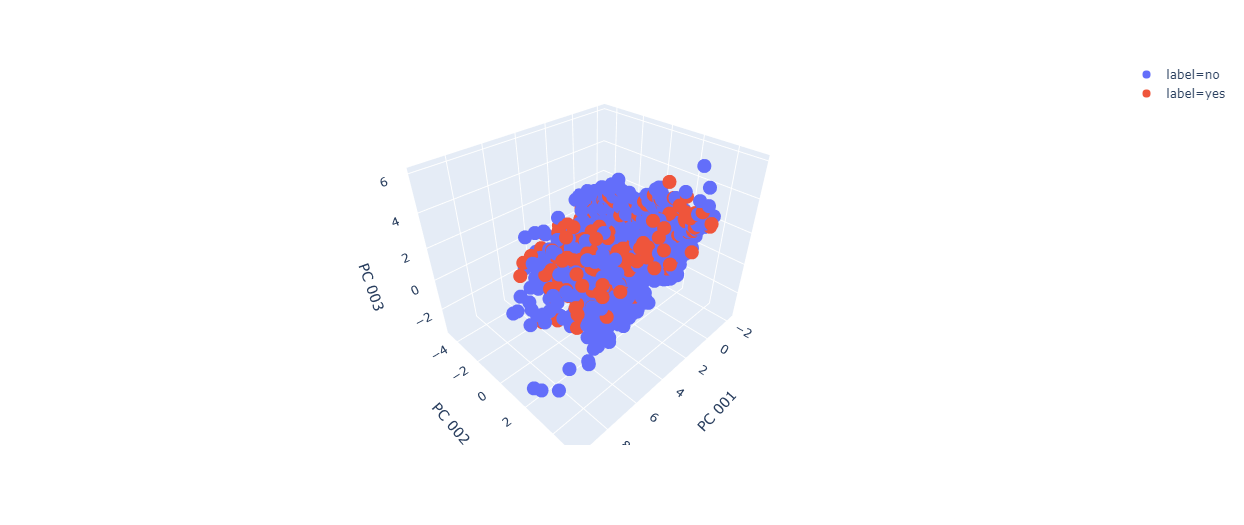

# Tsne

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne2d = TSNE(n_components=2)


In [ ]:
X_3d = tsne.fit_transform(x)
X_2d = tsne2d.fit_transform(x)

In [ ]:
df3 = pd.DataFrame(X_3d, columns=['Componente 1', 'Componente 2', 'Componente 3'])
df2 = pd.DataFrame(X_2d, columns=['Componente 1', 'Componente 2'])

In [ ]:
tsneFinalDF3 = pd.concat([df3, pd.DataFrame({'label':y})], axis = 1)
tsneFinalDF2 = pd.concat([df2, pd.DataFrame({'label':y})], axis = 1)

In [ ]:
tsneFinalDF2.head()

,Componente 1,Componente 2,label
0,15.009970,-77.291374,no
1,-26.915340,-28.367903,no
2,31.789721,8.942904,no
3,7.320154,-14.667156,no
4,-50.295315,21.268360,no


In [ ]:
tsneFinalDF3.head()


,Componente 1,Componente 2,Componente 3,label
0,15.983565,15.070499,-5.060971,no
1,2.871070,-15.683765,0.929803,no
2,7.387007,-7.610612,-3.234591,no
3,-8.901328,0.824465,1.387928,no
4,-10.119452,19.413244,0.660645,no


In [ ]:
px.scatter_3d(tsneFinalDF3,x='Componente 1',y='Componente 2',z='Componente 3',color='label')

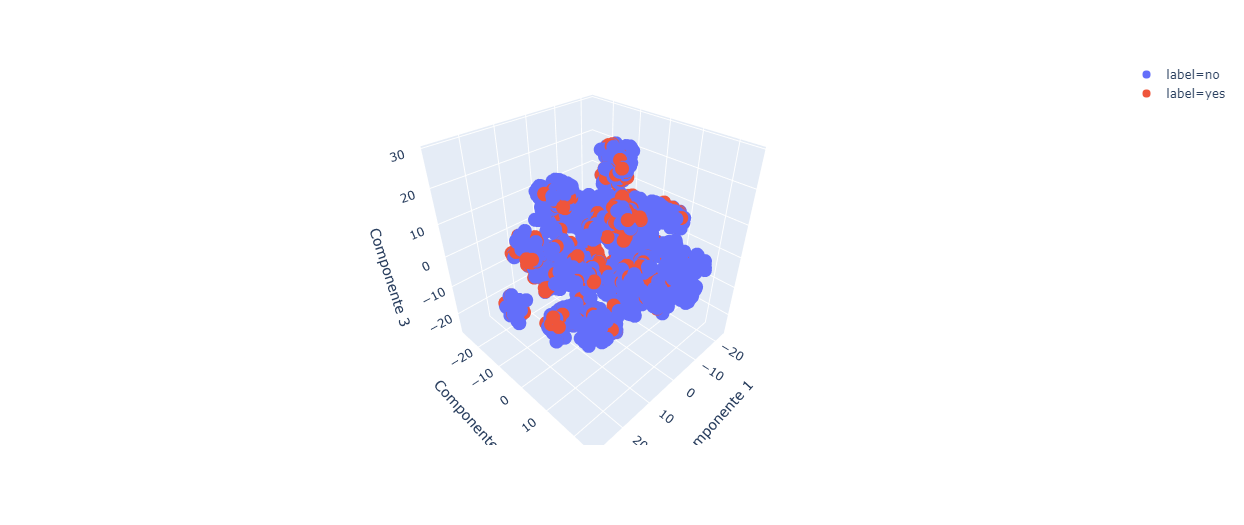

# Conclusiones 

Los analisis de clusters para el dataset indicaron los mejores resultados creando 2 grandes clusters de clientes, esto es muy probablemente debido a que el dataset esta orientado a decidir si un cliente hara una accion o no como solicitar/pagar un credito. 